# Analiza nepremičnin

Ta analiza je narejena glede na podatke o nepremičninah, ki se oddajajo v najem. Podatki so omejeni na najeme ki so primerni (oziroma cenovno ugodni) za študente. 
Vsebuje podatke o cenah, velikostih in lokacijah (občine) teh nepremičnin.

Analiza je razdeljena na štiri dele:

* Analiza povprečnih cen najema glede na občine
* Analiza cene na kvadratni meter po občinah
* Analiza števila razpoložljivih stanovanj po občinah
* Analiza velikosti nastanitev glede na občine

Za začetek uvozimo ustrezne pakete za prikazovanje grafov in datoteko CSV s podatki ki jih hočemo analizirati.

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PODATKI = pd.read_csv('rezultati.csv')

# Poglejmo kako izgledajo podatki (prikazanih je prvih nekaj podatkov)
print("Začetni podatki:")
PODATKI[["size", "price", "obcina"]].head(15)

Začetni podatki:


,size,price,obcina
0,12.0,300.00 EUR,Brežice
1,18.0,250.00 EUR,Ljubljana
2,15.0,270.00 EUR,Novo mesto
3,15.0,180.00 EUR,Ajdovščina
4,20.0,250.00 EUR,Cerknica
5,15.0,200.00 EUR,Celje
6,18.0,240.00 EUR,Ljubljana
7,18.0,400.00 EUR,Dol pri Ljubljani
8,15.0,210.00 EUR,Ajdovščina
9,20.0,550.00 EUR,Koper


## Analiza povprečnih cen najema glede na občine
Najprej bomo primerjali cene najema glede na občine. Najprej bomo podatke o ceni očistili za lažjo obdelavo (odstranili bomo 'EUR'). Potem bomo izračunali povprečno ceno najema za vsako občino in rezultati prikazali v tabeli (prikazanih je prvih 10). Na koncu bomo z grafom izpostavili občine z najvišjimi in najnižjimi povprečnimi najemninami ter.


In [210]:
PODATKI['cena_brez_eur'] = PODATKI['price'].str.replace(' EUR', '')
PODATKI['cena_brez_eur'] = pd.to_numeric(PODATKI['cena_brez_eur'])

# Povprečna cena nastanitev za vsako občino
povprecne_cene = PODATKI.groupby('obcina')['cena_brez_eur'].mean().reset_index()
povprecne_cene = povprecne_cene.rename(columns={'cena_brez_eur': 'povprecna cena (EUR)'})

razvrscene_povprecne_cene = povprecne_cene.sort_values(by = 'povprecna cena (EUR)', ascending=False)
razvrscene_povprecne_cene['povprecna cena (EUR)'] = razvrscene_povprecne_cene['povprecna cena (EUR)'].round(2)

print("Povprečna cena najema po občinah:")
razvrscene_povprecne_cene [['obcina', 'povprecna cena (EUR)']].head(10)


Povprečna cena najema po občinah:


,obcina,povprecna cena (EUR)
6,Dol pri Ljubljani,400.00
13,Koper,383.33
23,Piran,366.67
12,Kidričevo,360.00
9,Ig,360.00
16,Ljubljana,323.28
14,Kranj,310.00
36,Škofja Loka,307.50
10,Izola,300.00
21,Miren - Kostanjevica,300.00


### Grafični prikaz

Za boljšo predstavo dodamo še stolpični prikaz iz katerega so jasno razvidna razmerja (povprečnih najemnin) med občinami.

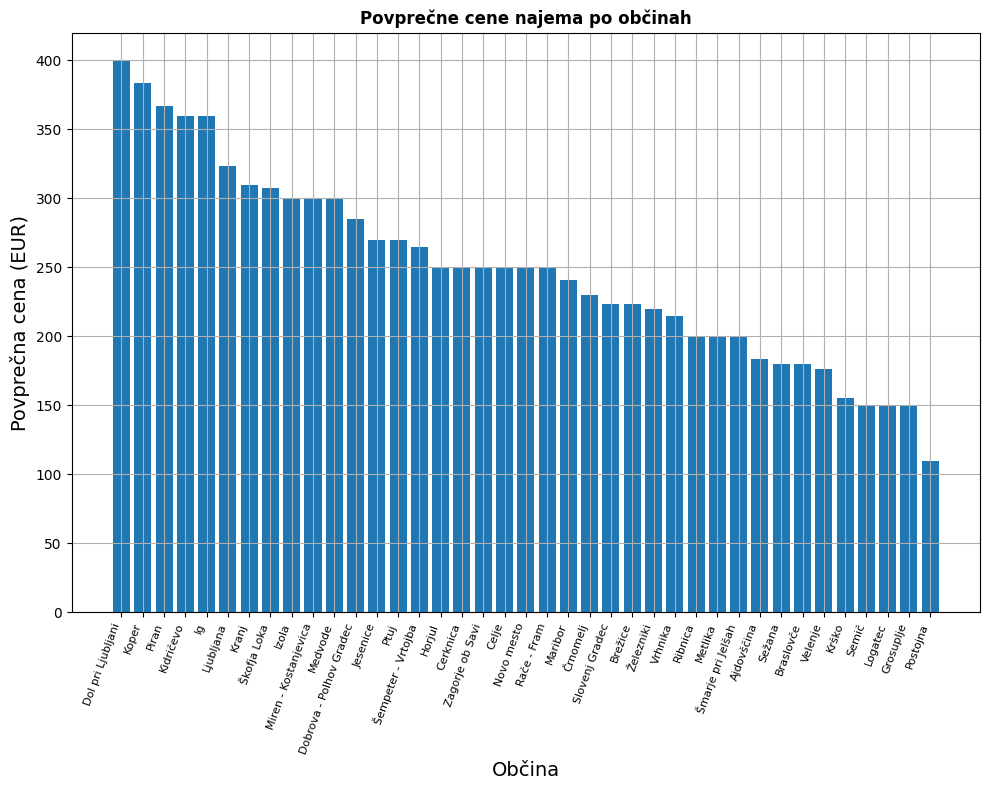

In [211]:
plt.figure(figsize=(10, 8))

plt.bar(razvrscene_povprecne_cene['obcina'], 
        razvrscene_povprecne_cene['povprecna cena (EUR)'])

plt.title('Povprečne cene najema po občinah', fontweight='bold')
plt.xlabel('Občina', fontsize=14)
plt.ylabel('Povprečna cena (EUR)', fontsize=14)
plt.xticks(rotation=70, ha='right', fontsize=8) 
plt.grid(True)
plt.tight_layout()
plt.show()


Iz grafa je razvidno, da so najdražje nastanitve večinoma v Ljubljani z okolico in pa ob obali. Tam je povprečna cena najema nad 300€. V manjših občinah pa so najemnine manjše, kar ni presenetljivo.

## Analiza cene na kvadratni meter po občinah
V tej analizi smo upoštevali tudi velikost nastanitev. Torej izračunali smo ceno najema glede na velikost nepremičnine (kvadratni meter) in dobljene cene primerjali glede na občine. V kodi smo najprej pretvorili podatke o velikosti v numerično obliko in izračunali ceno na kvadratni meter. Podatke smo združili po občinah in jih prikazali v tabeli.

In [212]:
PODATKI['size'] = pd.to_numeric(PODATKI['size'])

# Izračun cene na m^2
PODATKI['cena_na_m2'] = PODATKI['cena_brez_eur'] / PODATKI['size']

# Glede na občino
povprecna_cena_m2 = PODATKI.groupby('obcina')['cena_na_m2'].mean().round(2).reset_index()
povprecna_cena_m2 = povprecna_cena_m2.sort_values('cena_na_m2', ascending=False)

povprecna_cena_m2 = povprecna_cena_m2.rename(columns={'cena_na_m2': 'cena na m^2 (EUR)'})

print("Cena najema na kvadratni meter po občinah:")
povprecna_cena_m2[['obcina', 'cena na m^2 (EUR)']].head(10)

Cena najema na kvadratni meter po občinah:


,obcina,cena na m^2 (EUR)
27,Ribnica,40.00
10,Izola,30.00
8,Horjul,27.78
13,Koper,26.47
5,Dobrova - Polhov Gradec,22.62
6,Dol pri Ljubljani,22.22
23,Piran,21.18
16,Ljubljana,20.03
14,Kranj,19.38
19,Medvode,18.75


### Grafični prikaz
Za lažji pregled dobljenih podatkov dodamo še graf.

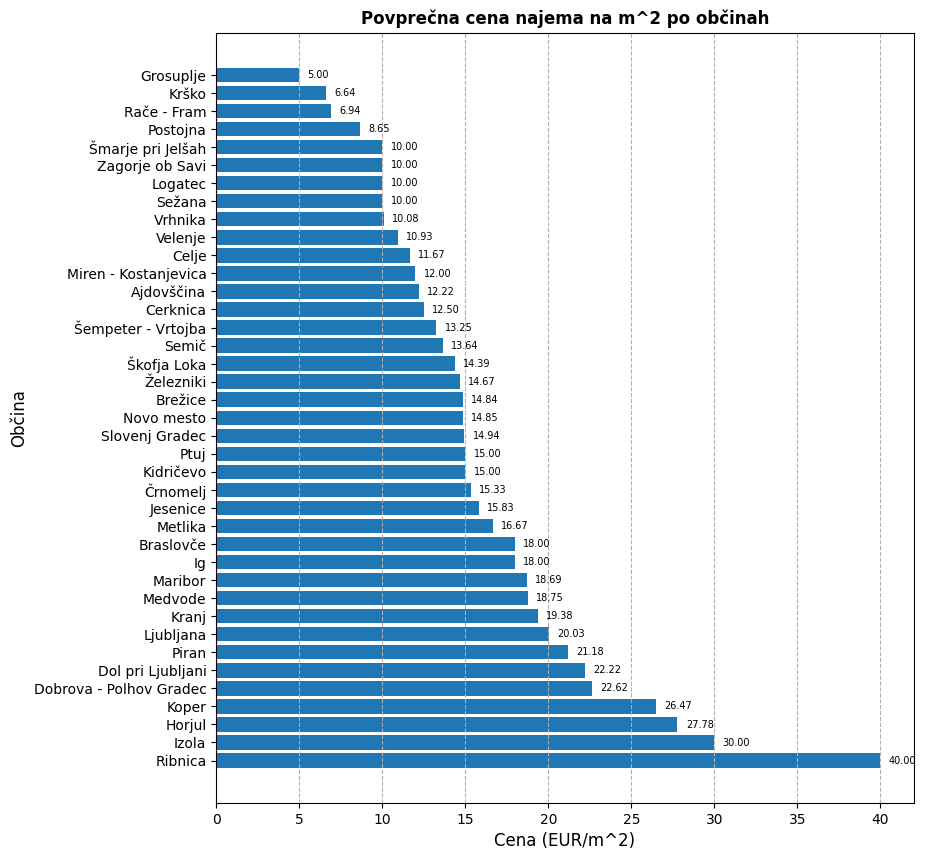

In [213]:
plt.figure(figsize=(9, 10))
bars = plt.barh(povprecna_cena_m2['obcina'], povprecna_cena_m2['cena na m^2 (EUR)'])

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
             ha='left', va='center', fontsize=7)

plt.title('Povprečna cena najema na m^2 po občinah', fontweight='bold')
plt.xlabel('Cena (EUR/m^2)', fontsize=12)
plt.ylabel('Občina', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()

S to analizo pridemo do zaključka, da se razvrstitev občin po ceni na kvadratni meter razlikuje od razvrstive občin po absolutni ceni. Na primer, Ribnica ima najvišjo ceno na kvadratni meter, iz prejšnjega grafa pa je razvidno da je glede na celotno najemnino med cenejšimi nastanitvami. Po drugi strani pa sta na primer Koper in Piran tudi glede na to analizo med dražjimi nastanitvami.

## Analiza števila razpoložljivih stanovanj po občinah
Zanima nas tudi razpoložljivost nastanitev v posameznih občinah. Torej v kateri občini je trg najbolj študentom prijazen. Prešteli smo torej število nastanitev v vsaki občini in prvih deset rezultatov prikazali v tabeli.

In [214]:
# Število stanovanj po občinah
st_stanovanj = PODATKI['obcina'].value_counts().reset_index()
st_stanovanj.columns = ['obcina', 'število stanovanj']

st_stanovanj.sort_values('število stanovanj', ascending=False).to_string(index=False)

print("Število stanovanj po občinah:")
st_stanovanj[['obcina', 'število stanovanj']].head(10)

Število stanovanj po občinah:


,obcina,število stanovanj
0,Ljubljana,93
1,Maribor,22
2,Novo mesto,6
3,Škofja Loka,4
4,Brežice,3
5,Velenje,3
6,Krško,3
7,Piran,3
8,Slovenj Gradec,3
9,Koper,3


### Grafični prikaz
Za bolj pregleden prikaz rezultatov smo dodali tortni diagram. Za nekatere občine so na spletu manj kot tri ponudbe zato bomo te občine združili v kategorijo "Drugo", za graf pa bomo uporabili tudi drugo barvno paleto (več barv). To bo preprečilo zmedo pri grafičnem prikazovanju podatkov. Grafu dodamo še legendo.

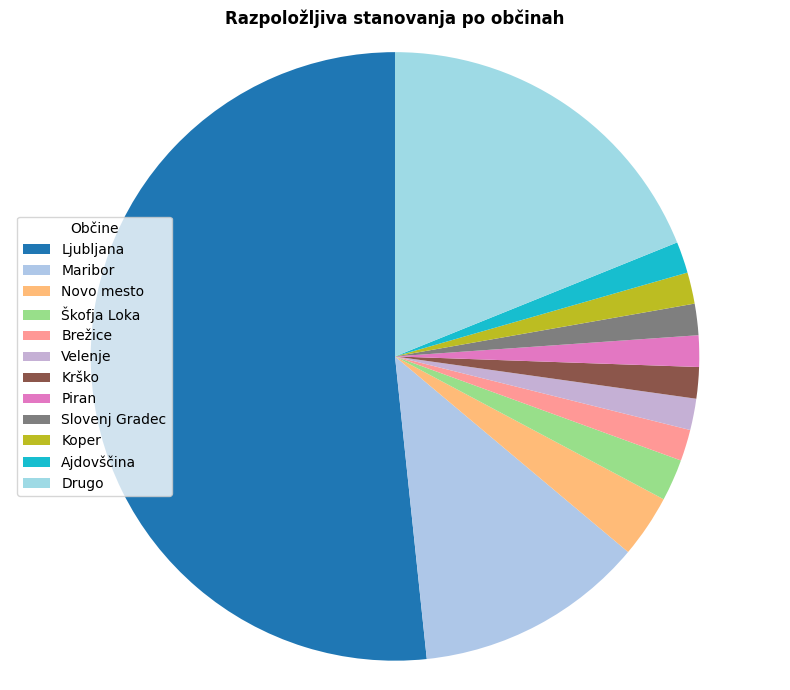

In [215]:
plt.figure(figsize=(8, 7))
min_stanje = 3  
velike_obcine = st_stanovanj[st_stanovanj['število stanovanj'] >= min_stanje]
male_obcine = st_stanovanj[st_stanovanj['število stanovanj'] < min_stanje]

labels = list(velike_obcine['obcina'])
values = list(velike_obcine['število stanovanj'])

# Občine, ki imajo manj kot 3 ponudbe
if len(male_obcine) > 0:
    labels.append('Drugo')
    values.append(male_obcine['število stanovanj'].sum())

num_categories = len(labels)
colors = plt.cm.tab20(np.linspace(0, 1, num_categories))
plt.pie(values, colors=colors, startangle=90)
plt.title('Razpoložljiva stanovanja po občinah', fontweight='bold')
plt.axis('equal')

# Legenda
plt.legend(labels, title="Občine", loc="center left")
plt.tight_layout()
plt.show()

Rezultati so pokazali, da so največja števila razpoložljivih stanovanj v večjih mestih, kot so na primer Ljubljana, Maribor in Koper. Drugod pa je ponudb majn.

## Analiza velikosti nastanitev glede na občine
Najprej bomo izračunali velikosti nepremičnin po občinah in mediano teh velikosti. Rabili bomo tudi podatek o številu razpoložjivih nastanitev v občinah. Z dobljenimi podatki bomo izračunali oziroma prikazali odstopanja velikosti nepremičnin (posamezne občine) od mediane velikosti nepremičnin iste občine.


In [216]:
povprecna_velikost = PODATKI.groupby('obcina')['size'].mean().round(2)
mediana_velikosti = PODATKI.groupby('obcina')['size'].median().round(2)
st_nepremicnin = PODATKI['obcina'].value_counts()

# Združimo vse metrike
velikost_po_obcinah = pd.DataFrame({
    'povprecna_velikost': povprecna_velikost,
    'mediana_velikosti': mediana_velikosti,
    'st_nepremicnin': st_nepremicnin
    })

velikost_po_obcinah = velikost_po_obcinah.reset_index()
velikost_po_obcinah = velikost_po_obcinah.rename(columns={'index': 'obcina'})
velikost_po_obcinah = velikost_po_obcinah.sort_values('povprecna_velikost', ascending=False)

velikost_po_obcinah = velikost_po_obcinah.rename(columns={
    'povprecna_velikost': 'povprečna velikost',
    'mediana_velikosti': 'mediana velikosti'
    })

print("Občine z največjimi nepremičninami (povprečna velikost):")
velikost_po_obcinah[['obcina', 'povprečna velikost', 'mediana velikosti']].head(10)

Občine z največjimi nepremičninami (povprečna velikost):


,obcina,povprečna velikost,mediana velikosti
36,Škofja Loka,124.00,125.0
26,Rače - Fram,36.00,36.0
15,Krško,33.33,20.0
7,Grosuplje,30.00,30.0
21,Miren - Kostanjevica,25.00,25.0
33,Zagorje ob Savi,25.00,25.0
12,Kidričevo,24.00,24.0
16,Ljubljana,24.00,16.0
32,Vrhnika,23.00,23.0
3,Celje,22.50,22.5


### Grafični prikaz
Zraven odstopanj od mediane so iz grafa razvidne tudi razlike v velikosti nastanitev med občinami. 

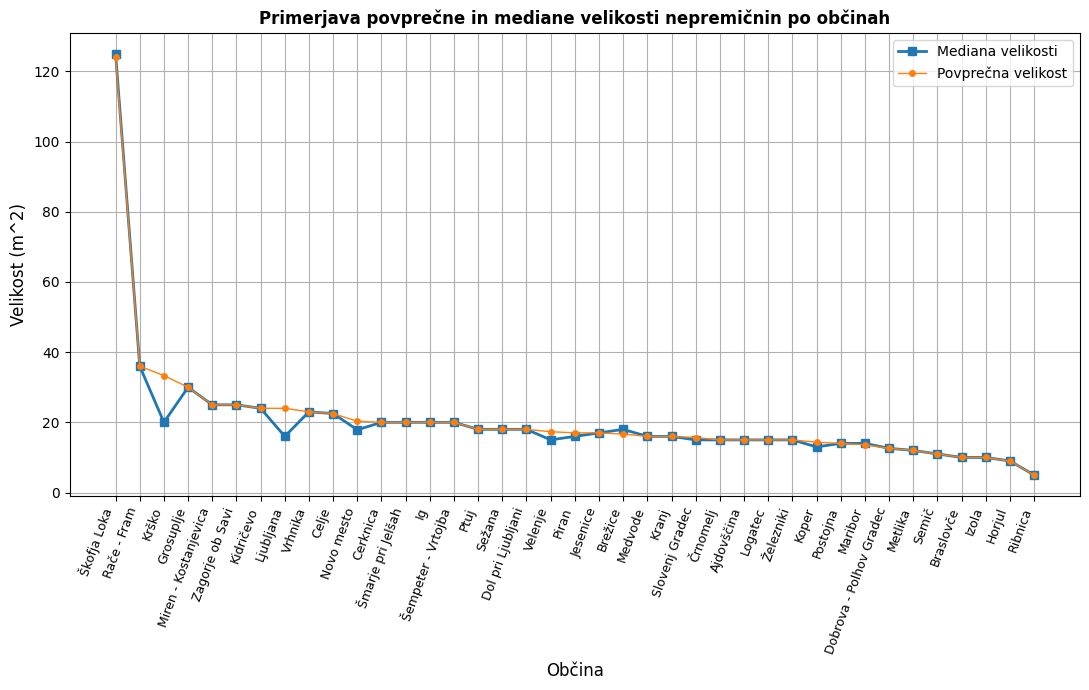

In [ ]:
plt.figure(figsize=(11, 7))

# Mediana
plt.plot(velikost_po_obcinah['obcina'], velikost_po_obcinah['mediana velikosti'], 
         marker='s', linewidth=2, markersize=6, label='Mediana velikosti')

# Povprečna velikost
plt.plot(velikost_po_obcinah['obcina'], velikost_po_obcinah['povprečna velikost'], 
         marker='o', linewidth=1, markersize=4, label='Povprečna velikost')

plt.title('Primerjava povprečne in mediane velikosti nepremičnin po občinah', fontweight='bold')
plt.xlabel('Občina', fontsize=12)
plt.ylabel('Velikost (m^2)', fontsize=12)
plt.xticks(rotation=70, ha='right', fontsize=9)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Odstopanja med povprečno velikostjo in mediano nam povejo, da v občinah, kjer je povprečje višje od mediane, lahko najdemo nadpovprečno velike nastanitve (torej višajo povprečje). Večje, mestne občine so v večini bolj na dnu grafa, kar pomei da so tam nepremičnine manjših velikosti kot tiste v manjših občinah. Zaradi tega lahko sklepamo da so v večjih občinah na voljo manjše nastanitve kot so na primer sobe ali majhna stanovanja.

## Zaključek
Ta analiza ponuja in jasno ponazori razmerja med cenamim in velikostmi nastanitev (ugodnih za študente) glede na občino. Pridemo do zaključka, da je največja ponudba nastanitev v večjih mestih oziroma občinah, kjer so tudi cene nastanitev najvišje.
Kar pa se tiče razlik v velikosti nastanitev glede na občine smo ugotovili, da so v manjših mestih oziroma občinah na voljo večje nastanitve. Kljub temu lahko zaključimo, da v večini (razen enega ektrema) med velikostmi nastanitev (glede na občine) ni večjih odstopanj.